In [2]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(f"ScreenTime-vs-MentalWellness.csv")

df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [4]:
df.shape

(400, 16)

 There's an empty extra column, we will remove

In [5]:
# We drop it by index
df.drop(df.columns[-1], axis=1, inplace=True)
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [7]:
df.isnull().sum()


user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

On this Dataset, we can observe there are no duplicated values or null values

In [9]:
df.dtypes

user_id                         object
age                              int64
gender                          object
occupation                      object
work_mode                       object
screen_time_hours              float64
work_screen_hours              float64
leisure_screen_hours           float64
sleep_hours                    float64
sleep_quality_1_5                int64
stress_level_0_10              float64
productivity_0_100             float64
exercise_minutes_per_week        int64
social_hours_per_week          float64
mental_wellness_index_0_100    float64
dtype: object

In [10]:
df.nunique()

user_id                        400
age                             36
gender                           3
occupation                       5
work_mode                        3
screen_time_hours              314
work_screen_hours              262
leisure_screen_hours           316
sleep_hours                    230
sleep_quality_1_5                4
stress_level_0_10               73
productivity_0_100             276
exercise_minutes_per_week      196
social_hours_per_week          159
mental_wellness_index_0_100    263
dtype: int64

In [11]:
df.describe(include="all")

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400,400.00000,400,400,400,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
unique,400,NaN,3,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,U0001,NaN,Female,Employed,Remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,222,207,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.77750,NaN,NaN,NaN,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,NaN,7.46608,NaN,NaN,NaN,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,NaN,16.00000,NaN,NaN,NaN,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,NaN,24.00000,NaN,NaN,NaN,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,NaN,30.00000,NaN,NaN,NaN,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,NaN,35.00000,NaN,NaN,NaN,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000


In [12]:
# We are setting the user_id as index
df.set_index("user_id")

,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
user_id,,,,,,,,,,,,,,
U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3
U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5
U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6


In [13]:
df.to_csv("cleaned_data.csv", index=False)
print("cleaned_data.csv has been saved")

cleaned_data.csv has been saved


In [14]:
df = pd.read_csv("cleaned_data.csv")
df = df.copy()

In [15]:
df = df.set_index("user_id")

In [16]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [17]:
num.head()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
user_id,,,,,,,,,,,
U0001,33,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
U0002,28,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
U0003,35,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
U0004,42,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
U0005,28,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


In [18]:
cat.head()

,gender,occupation,work_mode
user_id,,,
U0001,Female,Employed,Remote
U0002,Female,Employed,In-person
U0003,Female,Employed,Hybrid
U0004,Male,Employed,Hybrid
U0005,Male,Student,Remote


In [19]:
num.describe()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


In [20]:
relevant_columns =["screen_time_hours","sleep_hours","sleep_quality_1_5","productivity_0_100","mental_wellness_index_0_100"]

In [21]:
df[relevant_columns]

,screen_time_hours,sleep_hours,sleep_quality_1_5,productivity_0_100,mental_wellness_index_0_100
user_id,,,,,
U0001,10.79,6.63,1,44.7,9.3
U0002,7.40,8.05,3,78.0,56.2
U0003,9.78,6.48,1,51.8,3.6
U0004,11.13,6.89,1,37.0,0.0
U0005,13.22,5.79,1,38.5,0.0
...,...,...,...,...,...
U0396,6.43,7.75,1,64.6,39.3
U0397,9.59,5.57,1,47.4,3.5
U0398,8.72,7.56,1,57.3,6.6


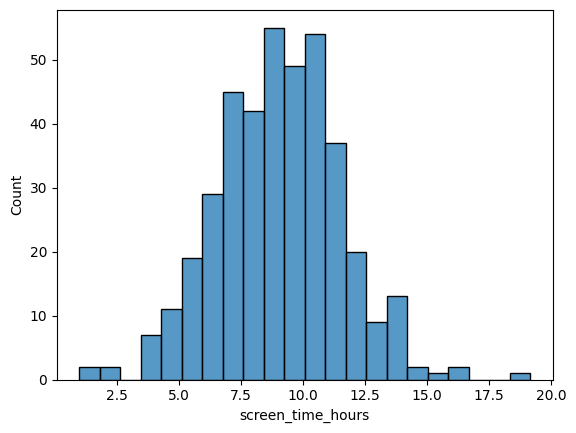

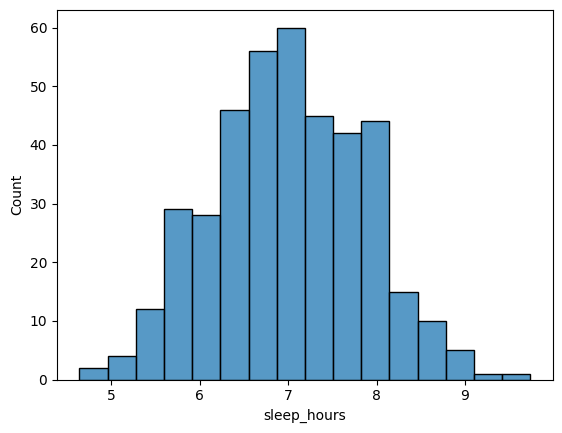

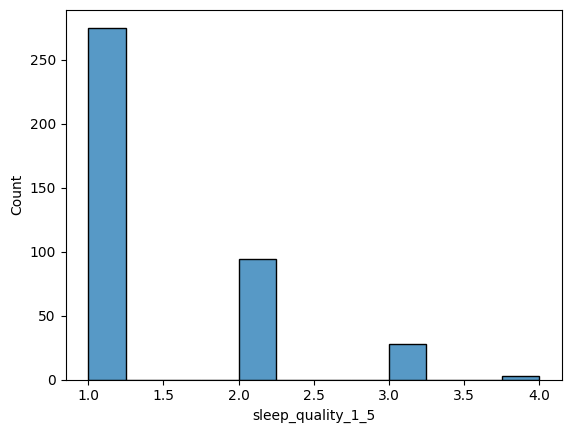

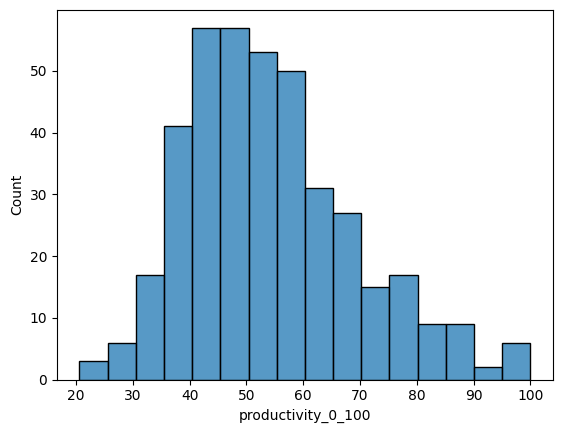

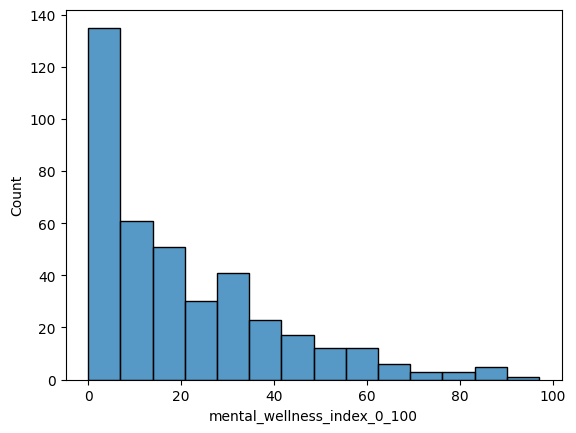

In [22]:
for col in relevant_columns:
    sns.histplot(num[col])
    plt.show()

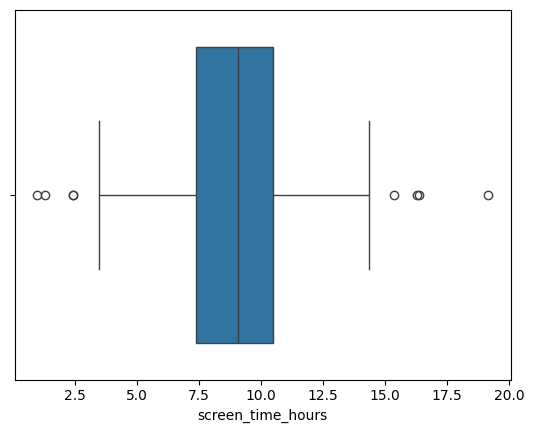

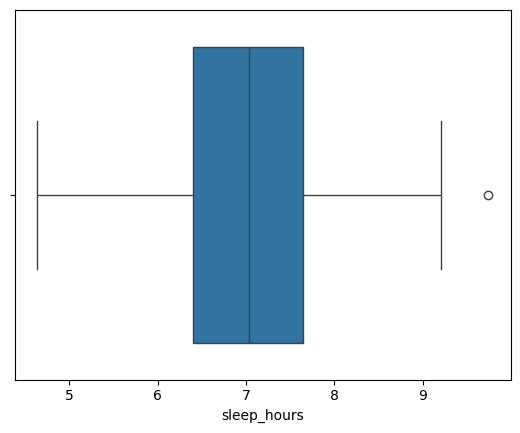

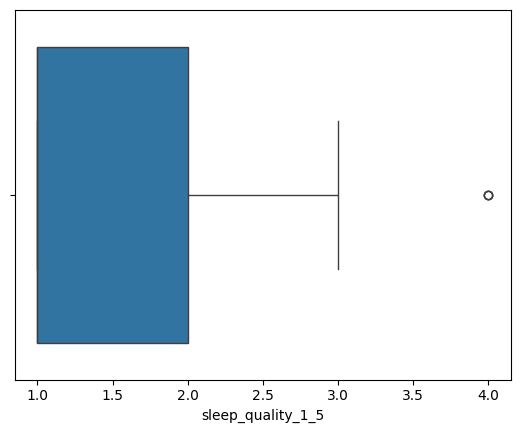

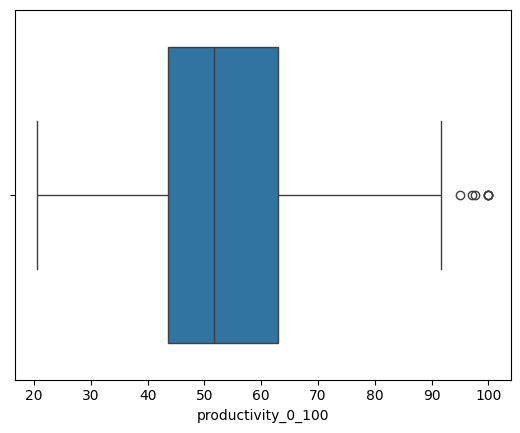

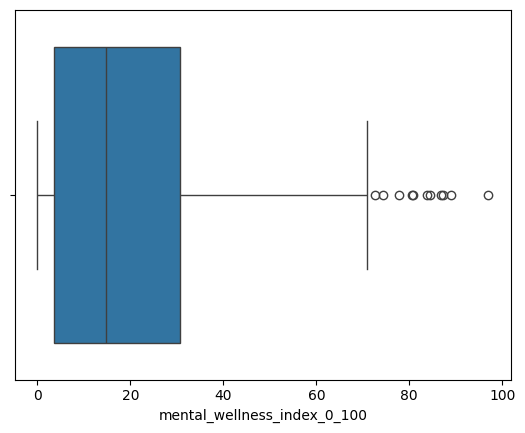

In [23]:
for col in relevant_columns:
    sns.boxplot(data=num, x=col)
    plt.show()

In [24]:
cat.head()

,gender,occupation,work_mode
user_id,,,
U0001,Female,Employed,Remote
U0002,Female,Employed,In-person
U0003,Female,Employed,Hybrid
U0004,Male,Employed,Hybrid
U0005,Male,Student,Remote


In [25]:
count_gender = cat["gender"].value_counts()
count_gender

gender
Female              222
Male                170
Non-binary/Other      8
Name: count, dtype: int64

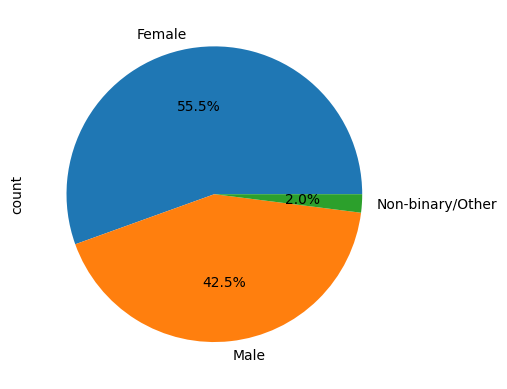

In [26]:
cat["gender"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [27]:
count_occ = cat["occupation"].value_counts()
count_occ

occupation
Employed         207
Student          107
Self-employed     45
Unemployed        27
Retired           14
Name: count, dtype: int64

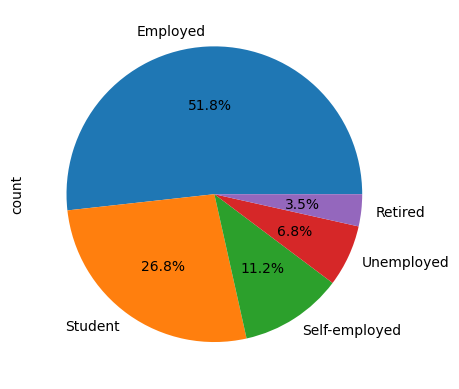

In [28]:
cat["occupation"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [29]:
count_work = cat["work_mode"].value_counts()
count_work

work_mode
Remote       150
Hybrid       146
In-person    104
Name: count, dtype: int64

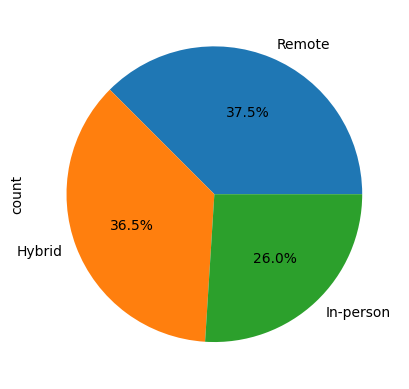

In [30]:
cat["work_mode"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [31]:
num[["leisure_screen_hours","work_screen_hours","productivity_0_100"]].corr()


,leisure_screen_hours,work_screen_hours,productivity_0_100
leisure_screen_hours,1.000000,-0.286414,-0.500558
work_screen_hours,-0.286414,1.000000,-0.335697
productivity_0_100,-0.500558,-0.335697,1.000000


In [33]:
general_screen_time = df["leisure_screen_hours"] + df["work_screen_hours"]

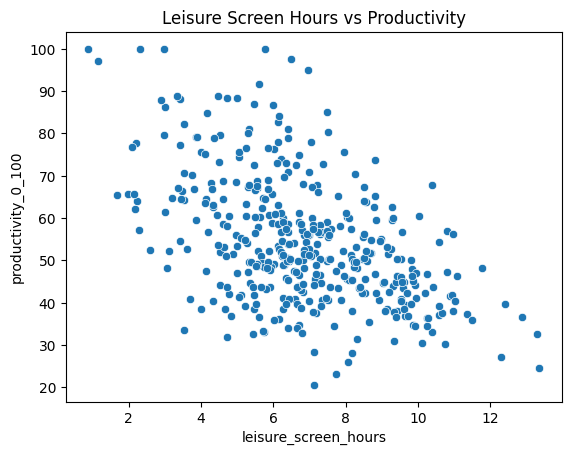

In [46]:

sns.scatterplot(data=df, x="leisure_screen_hours", y="productivity_0_100")
plt.title("Leisure Screen Hours vs Productivity")
plt.show()

## Analysis for Leisure Screen Hours vs Productivity

The data points show a moderate negative relationship between leisure screen time and productivity.
Most observations are concentrated around the mid-range of leisure hours, suggesting that users who spend more time on screens for leisure purposes tend to experience slightly lower productivity.

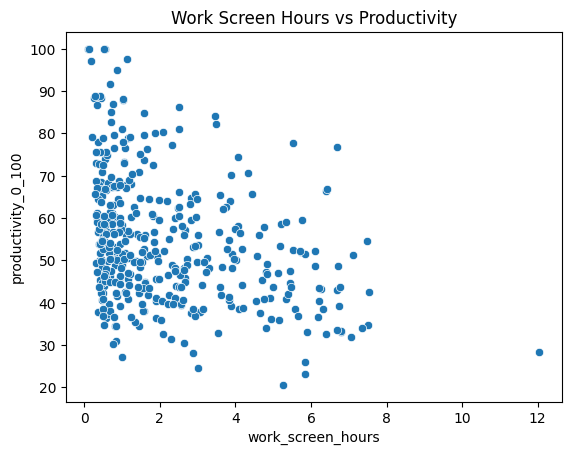

In [47]:

sns.scatterplot(data=df, x="work_screen_hours", y="productivity_0_100")
plt.title("Work Screen Hours vs Productivity")
plt.show()

## Analysis for Word Screen Hours vs Productivity

The distribution is skewed toward lower work screen hours, with most users spending limited time on screens for work and one noticeable high-value outlier (around 12 hours).
The trend line is nearly flat, indicating no strong correlation between work-related screen time and productivity.

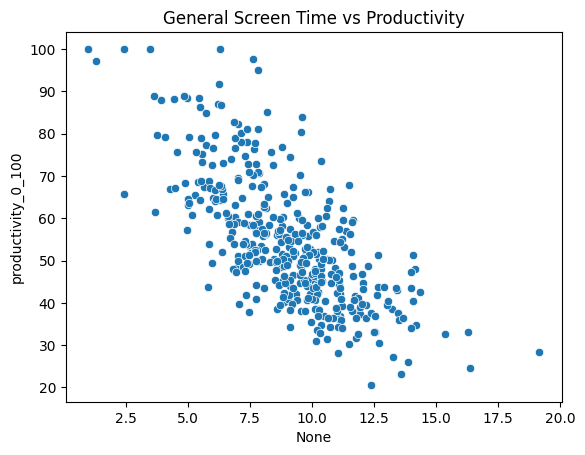

In [48]:
sns.scatterplot(data=df, x=general_screen_time, y="productivity_0_100")
plt.title("General Screen Time vs Productivity")
plt.show()

## Analysis for General time

When combining leisure and work hours, the data shows a weak negative correlation with productivity.
Most points are tightly clustered around the mid-range, suggesting limited variability and a small decline in productivity as total screen time increases

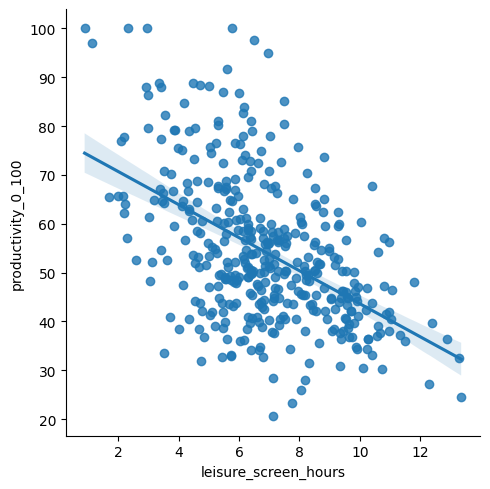

In [45]:
leisure_work_copy = df.copy()
leisure_work_copy["general_screen_time"] = leisure_work_copy["leisure_screen_hours"]+ leisure_work_copy["work_screen_hours"]

sns.lmplot(data=df, x="leisure_screen_hours", y="productivity_0_100")
plt.show()


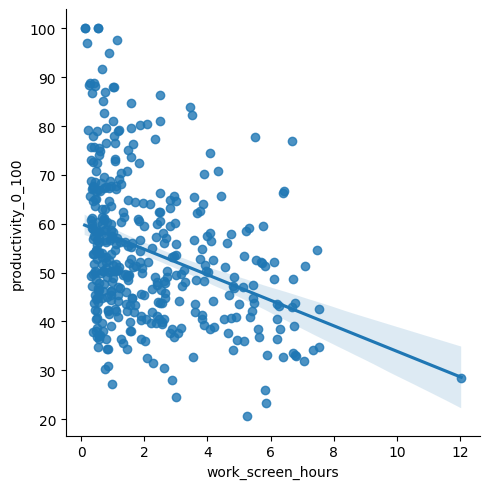

In [49]:
sns.lmplot(data=df, x="work_screen_hours", y="productivity_0_100")
plt.show()

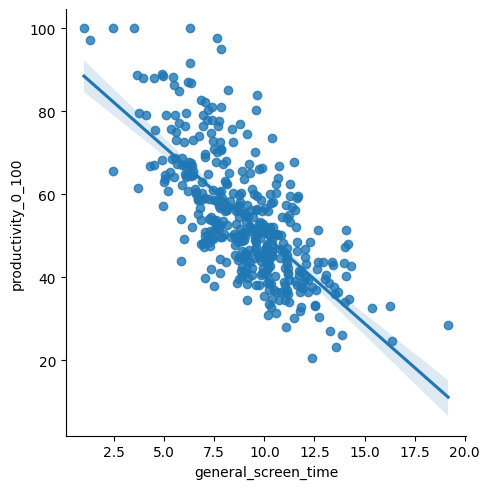

In [50]:
sns.lmplot(data= leisure_work_copy, x="general_screen_time",y="productivity_0_100")

plt.show()

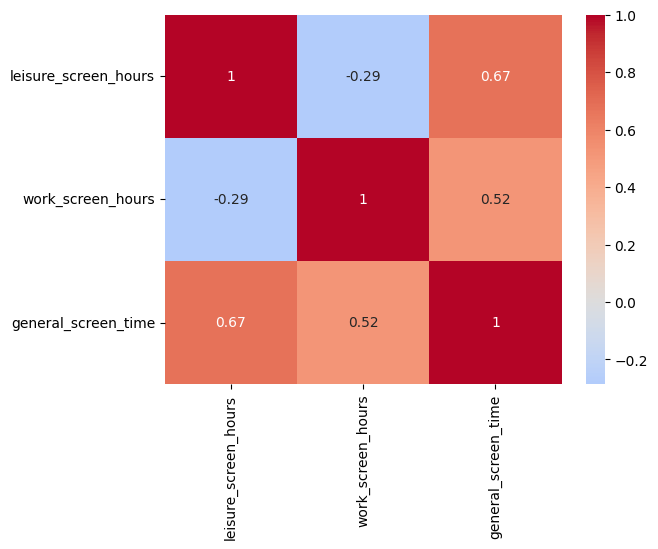

In [ ]:
corr_cols = ["leisure_screen_hours","work_screen_hours","general_screen_time"]
corr_matrix = leisure_work_copy[corr_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",center=0)
plt.show()


## Analysis by the heatmap

Leisure vs Work (-0.29): a small inverse relationship — people who spend more time on leisure screens tend to spend a bit less on work screens.

Leisure vs General (0.67): a strong positive relationship — leisure time makes up a large part of total screen time.

Work vs General (0.52): a moderate positive relationship — work screen time also adds to total screen time, but not as much as leisure.


## Insights

People who spend more time on screens for leisure tend to be slightly less productive.

Time spent on screens for work seems to have little or no impact on productivity.

Overall screen time (leisure + work) has a small negative effect on productivity.

Leisure and work screen times are slightly inversely related, suggesting that spending more time on one type of screen tends to reduce the other.